In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ETL

EXTRACT DATA:

In [3]:
# Load the raw data and view in DataFrame.
rawdata = pd.read_csv("apple_quality.csv")
rawdata

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


TRANSFORM DATA:

In [4]:
# Find null values
print(rawdata.isnull().sum())

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [5]:
# Remove null values
rawdata = rawdata.dropna()

In [6]:
# Show cleaned results
print(rawdata.isnull().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [7]:
# Identify dtype.
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [8]:
# Convert "Acidity" dtype to numerical value
rawdata['Acidity'] = rawdata['Acidity'].astype(float)
print(rawdata.dtypes)

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


C:\Users\kento\AppData\Local\Temp\ipykernel_23976\3386601408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['Acidity'] = rawdata['Acidity'].astype(float)


In [9]:
# Remove "A_id" column
data = rawdata.drop(columns=['A_id'])
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


LOAD DATA:

In [10]:
# Load and insert data into SQL database.
conn = sqlite3.connect("appledata.db")

In [11]:
# Write the data to a SQL table named "apple_quality".
data.to_sql("apples", conn, if_exists="replace", index=False)

4000

In [12]:
# Close the database connection
conn.close()

In [13]:
# Connect to the SQLite database.
conn = sqlite3.connect("appledata.db")

In [14]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

In [15]:
# Execute a SQL query to fetch all data from the "apples" table
cursor.execute("SELECT * FROM apples")

In [16]:
# Fetch all rows from the result.
rows = cursor.fetchall()

In [17]:
# Display the fetched rows.
for row in rows:
        print(row)

(-3.970048523, -2.512336381, 5.346329613, -1.012008712, 1.844900361, 0.329839797, -0.491590483, 'good')
(-1.195217191, -2.839256528, 3.664058758, 1.588232309, 0.853285795, 0.867530082, -0.722809367, 'good')
(-0.292023862, -1.351281995, -1.738429162, -0.342615928, 2.838635512, -0.038033328, 2.621636473, 'bad')
(-0.657195773, -2.271626609, 1.324873847, -0.097874716, 3.637970491, -3.413761338, 0.790723217, 'good')
(1.36421682, -1.296611877, -0.384658206, -0.55300577, 3.030874354, -1.303849429, 0.501984036, 'good')
(-3.425399755, -1.409082204, -1.913511195, -0.555774864, -3.85307147, 1.914615916, -2.981523169, 'bad')
(1.331605736, 1.635955715, 0.875974244, -1.67779794, 3.106344455, -1.847416733, 2.414170509, 'good')
(-1.995462096, -0.42895848, 1.530643583, -0.742971676, 0.158834003, 0.974437858, -1.470125066, 'good')
(-3.867632233, -3.734513576, 0.986429067, -1.20765455, 2.292872919, 4.080920787, -4.871904758, 'bad')
(-0.727982709, -0.442820353, -4.092222827, 0.597512917, 0.393714261, 1.62

In [18]:
# Close the cursor
cursor.close()

# DATA LOADING AND PRELIMINARY VISUALIZATION

LOAD DATA:

In [19]:
# Read the data in DataFrame from the SQL database.
query = "SELECT * FROM apples"
df = pd.read_sql_query(query, conn)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


PRELIMINARY VISUALIZATION:

C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

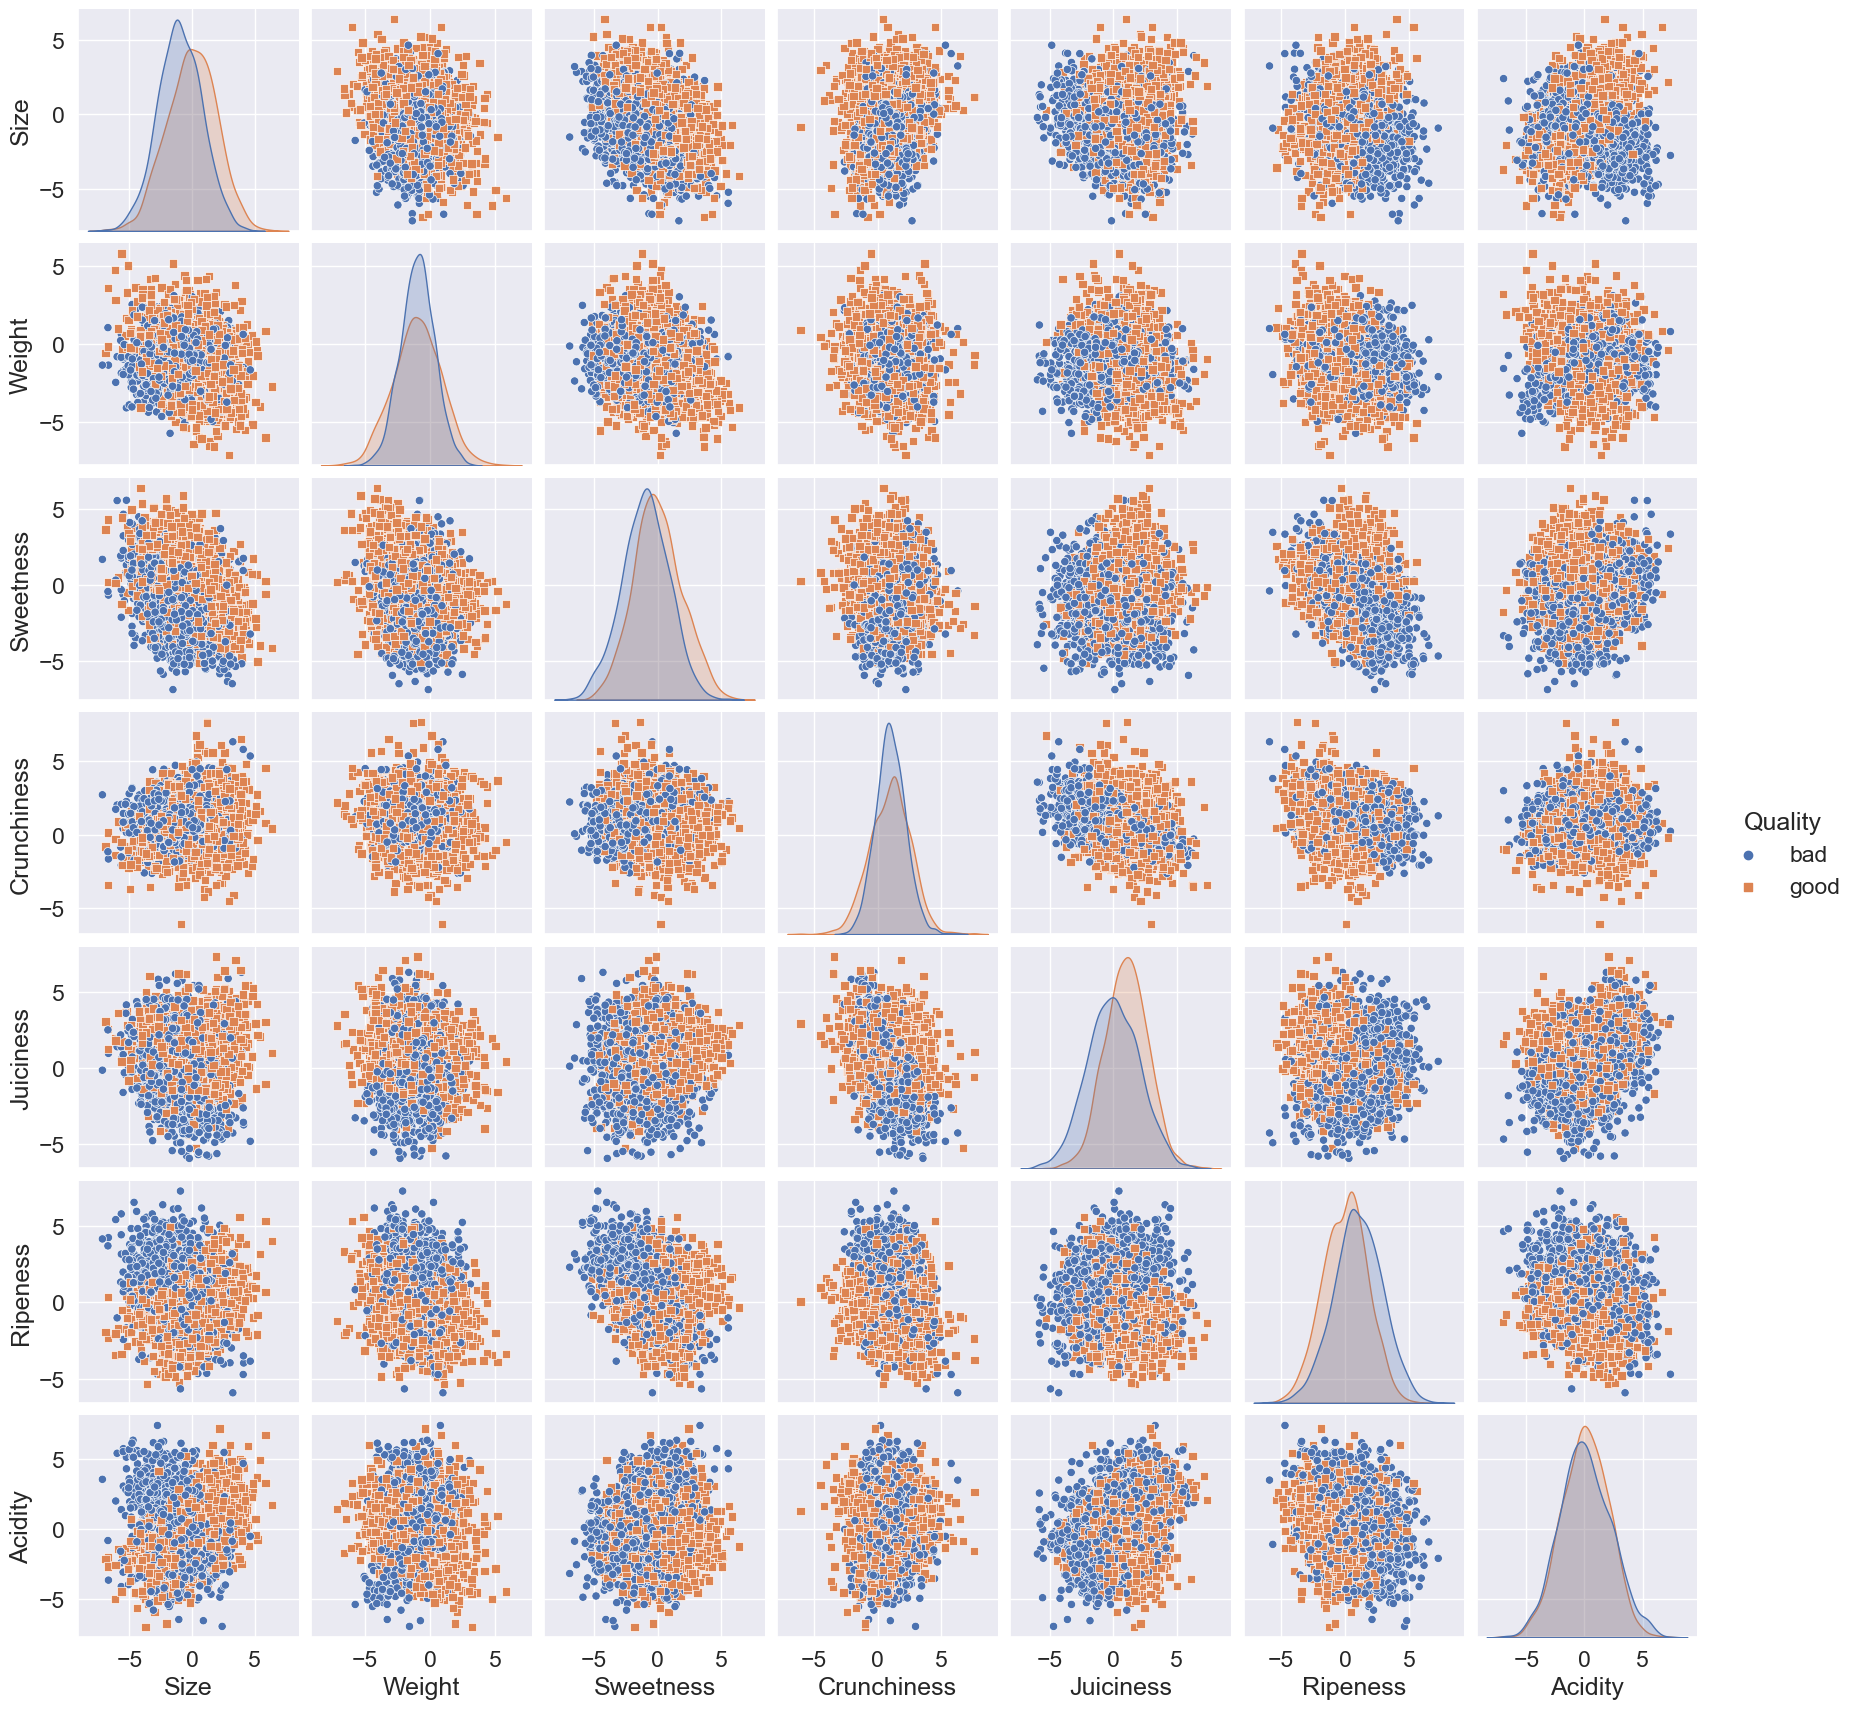

In [20]:
# Plot the data in seaborn pairplot.
sns.set(font_scale=1.5)
df["Quality"] = pd.Categorical(df["Quality"], categories=["bad", "good"])
pairplot = sns.pairplot(df, hue="Quality", markers=["o", "s"])
pairplot.savefig("pairplot.png")
plt.show()

# LOGISTIC REGRESSION MODEL

STEP 1 - PREPROCESS

In [21]:
# Transform "Quality" colulmn with encoding function
def encode_Quality(Quality):
    if Quality == "good":
        return 1
    else:
        return 0


In [22]:
# Call the encode_Quality function on the Quality column
df['Quality'] = df['Quality'].apply(encode_Quality)

df['Quality'] = df['Quality'].astype(float)

# Review the DataFrame
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1.0
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0.0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1.0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0.0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1.0


In [23]:
# Prepare the data using the StandardScaler model and fit_transform function to scall all columns with numerical values
df_scaled = StandardScaler().fit_transform(df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness',
                                                   'Acidity']])
# Display the scaled data
df_scaled

array([[-1.79842417, -0.95037339,  2.99342063, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-0.35906018, -1.15440431,  2.12769769, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [ 0.1094454 , -0.22575916, -0.65250727, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [-1.1056547 , -0.71690397, -1.01378401, ...,  0.87437918,
         2.27595716, -0.66895013],
       [-1.81811235, -0.49290842,  1.45990059, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 0.40540882, -0.45307081,  0.30449592, ...,  0.39095445,
        -0.68021237,  0.72176064]])

In [24]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    df_scaled,
    columns=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity'])
df_scaled

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [25]:
# Concatenate the df_saled and encoded 'Quality'.
Quality = df['Quality']
df_apples = pd.DataFrame(df_scaled, columns=['Size', 'Weight', 'Sweetness', 'Crunchiness','Juiciness', 'Ripeness', 'Acidity'])
df_apples['Quality'] = Quality
df_apples

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1.0
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1.0
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0.0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1.0
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1.0
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0.0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1.0
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0.0
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,1.0


STEP 2 - SPLIT AND TRAIN

In [26]:
# Separate the features from the target.
y = df_apples['Quality']
X = df_apples.drop(columns="Quality")

In [27]:
# Split the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(3000, 7)

In [28]:
# Create a Logistic Regression model.
lr_model = LogisticRegression(random_state=1)

In [29]:
# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

STEP 3 - PREDICT

In [30]:
# Generate training and testing predictions.
lr_predictions = lr_model.predict(X_test)

STEP 4 - EVALUATION

In [31]:
# Calculate the Accuracy Score.
lr_as = accuracy_score(y_test, lr_predictions)

In [32]:
# Calculate the Confusion Matrix.
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_cm_df = pd.DataFrame(
    lr_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [33]:
# Calculate the Classification Report.
lr_cr = classification_report(y_test, lr_predictions)

In [34]:
# Display all three evaluations.
print("\033[1m\033[4m*** LOGISTIC REGRESSION MODEL EVALUATIONS ***\033[0m\n")

print("All Features Included\n")
print(f"ACCURACY SCORE: {lr_as}\n")
print("CONFUSION MATRIX:")
display(lr_cm_df)
print("CLASSIFICATION REPORT:")
print(lr_cr)

*** LOGISTIC REGRESSION MODEL EVALUATIONS ***

All Features Included

ACCURACY SCORE: 0.754

CONFUSION MATRIX:


,Predicted 0,Predicted 1
Actual 0,368,131
Actual 1,115,386


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       499
         1.0       0.75      0.77      0.76       501

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



# RANDOM FOREST MODEL

STEP 1 - PREPROCESS

In [35]:
# Read the data in DataFrame from the SQL database.
query = "SELECT * FROM apples"
df = pd.read_sql_query(query, conn)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


STEP 2 - SPLIT AND TRAIN

In [36]:
# # Split the features from the target.
x = df_apples.drop("Quality", axis=1)
y = df_apples["Quality"]

In [37]:
# Split the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train.shape

(3000, 7)

In [38]:
# Create a random forest model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [39]:
# Fitting the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=78)

STEP 3 - PREDICT

In [40]:
# Making predictions on the testing set.
rf_predictions = rf_model.predict(X_test)

STEP 4 - EVALUATION

In [41]:
# Calculate the Accuracy Score.
rf_as = accuracy_score(y_test, rf_predictions)


In [42]:
# Calculate the Confusion Matrix.
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [43]:
# Calculate the Classification Report.
rf_cr = classification_report(y_test, rf_predictions)

In [44]:
# Display all three evaluations.
print("\033[1m\033[4m*** RANDOM FOREST MODEL EVALUATIONS ***\033[0m\n")

print("All Features Included\n")

print(f"ACCURACY SCORE: {rf_as}\n")
print("CONFUSION MATRIX:")
display(rf_cm_df)
print("CLASSIFICATION REPORT:")
print(rf_cr)

*** RANDOM FOREST MODEL EVALUATIONS ***

All Features Included

ACCURACY SCORE: 0.886

CONFUSION MATRIX:


,Predicted 0,Predicted 1
Actual 0,450,62
Actual 1,52,436


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       512
         1.0       0.88      0.89      0.88       488

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [45]:
# Rank imporance of features.
fi = rf_model.feature_importances_
fi_df = pd.DataFrame({"Feature": X.columns, "Importance": fi })
fi_df = fi_df.sort_values(by="Importance", ascending=False)
print("Feature Importance Ranking:")
print(fi_df)

Feature Importance Ranking:
       Feature  Importance
4    Juiciness    0.165536
5     Ripeness    0.164077
0         Size    0.160593
2    Sweetness    0.147335
6      Acidity    0.128319
1       Weight    0.121169
3  Crunchiness    0.112971


 # LOGISTIC REGRESSION MODEL #2

In [46]:
# Connect to the SQLite database.
conn = sqlite3.connect("appledata.db")

# Read the data in DataFrame from the SQL database.
query = "SELECT * FROM apples"
df2 = pd.read_sql_query(query, conn)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [47]:
df2.drop(columns=["Size", "Weight"], inplace=True)
df2

,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...
3995,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [48]:
# Separate the features from the target.
y = df2['Quality']
X = df2.drop(columns="Quality")

In [49]:
# Split the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(3000, 5)

In [50]:
# Create a Logistic Regression model.
lr2_model = LogisticRegression(random_state=1)

In [51]:
# Train the model
lr2_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [52]:
# Generate training and testing predictions.
lr2_predictions = lr2_model.predict(X_test)

In [53]:
# Calculate the Accuracy Score.
lr2_as = accuracy_score(y_test, lr2_predictions)

In [54]:
# Calculate the Confusion Matrix.
lr2_cm = confusion_matrix(y_test, lr2_predictions)
lr2_cm_df = pd.DataFrame(
    lr_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [55]:
# Calculate the Classification Report.
lr2_cr = classification_report(y_test, lr2_predictions)

In [56]:
# Display all three evaluations.
print("\033[1m\033[4m*** LOGISTIC REGRESSION MODEL #2 EVALUATIONS ***\033[0m\n")

print("Less Features - Size and Weight Removed\n")

print(f"ACCURACY SCORE: {lr2_as}\n")
print("CONFUSION MATRIX:")
display(lr2_cm_df)
print("CLASSIFICATION REPORT:")
print(lr2_cr)

*** LOGISTIC REGRESSION MODEL #2 EVALUATIONS ***

Less Features - Size and Weight Removed

ACCURACY SCORE: 0.67

CONFUSION MATRIX:


,Predicted 0,Predicted 1
Actual 0,368,131
Actual 1,115,386


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         bad       0.67      0.68      0.67       499
        good       0.67      0.66      0.67       501

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



#  LOGISTIC REGRESSION MODEL #3

In [57]:
# Connect to the SQLite database.
conn = sqlite3.connect("appledata.db")

# Read the data in DataFrame from the SQL database.
query = "SELECT * FROM apples"
df3 = pd.read_sql_query(query, conn)
df3

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [58]:
df3.drop(columns=["Crunchiness"], inplace=True)
df3

,Size,Weight,Sweetness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,2.161435,0.214488,-2.229720,good


In [59]:
# Separate the features from the target.
y = df3['Quality']
X = df3.drop(columns="Quality")

In [60]:
# Split the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(3000, 6)

In [61]:
# Create a Logistic Regression model.
lr3_model = LogisticRegression(random_state=1)

In [62]:
# Train the model
lr3_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [63]:
# Generate training and testing predictions.
lr3_predictions = lr3_model.predict(X_test)

In [64]:
# Calculate the Accuracy Score.
lr3_as = accuracy_score(y_test, lr3_predictions)

In [65]:
# Calculate the Confusion Matrix.
lr3_cm = confusion_matrix(y_test, lr3_predictions)
lr3_cm_df = pd.DataFrame(
    lr_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [66]:
# Calculate the Classification Report.
lr3_cr = classification_report(y_test, lr3_predictions)

In [67]:
# Display all three evaluations.
print("\033[1m\033[4m*** LOGISTIC REGRESSION MODEL #3 EVALUATIONS ***\033[0m\n")

print("Less Features - Crunchiness Removed\n")

print(f"ACCURACY SCORE: {lr3_as}\n")
print("CONFUSION MATRIX:")
display(lr3_cm_df)
print("CLASSIFICATION REPORT:")
print(lr3_cr)

*** LOGISTIC REGRESSION MODEL #3 EVALUATIONS ***

Less Features - Crunchiness Removed

ACCURACY SCORE: 0.755

CONFUSION MATRIX:


,Predicted 0,Predicted 1
Actual 0,368,131
Actual 1,115,386


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         bad       0.76      0.74      0.75       499
        good       0.75      0.77      0.76       501

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.75      1000

